## Introduction

In this notebook, I have used spaCy annotate raw text from the PDFs.
spaCy is an open source library for NLP with components for NER and dependency parsing which will be useful for the use case.

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 .Install libraries

Install spaCy. By default, spaCy 2.2.4 is installed on colab.

In [ ]:
!pip install spacy


In [ ]:
!python -m spacy info


============================== Info about spaCy ==============================

spaCy version    2.2.4                         
Location         /usr/local/lib/python3.7/dist-packages/spacy
Platform         Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
Python version   3.7.11                        
Models           en                            



In [ ]:
#imports
import os 
import spacy
import random
from spacy.tokens import Span
import pandas as pd
from pandas import DataFrame
import json
from spacy.matcher import Matcher, PhraseMatcher
from spacy.lang.en import English
import re

In [ ]:

#os
base_path = '/content/drive/MyDrive/week6'

save_path = '/content/drive/MyDrive/week6'
os.chdir(base_path)
os.getcwd()

'/content/drive/MyDrive/week6'

## 2 .Getting the variables to extract as user input 

The raw input text extracted from PDFs is stored in base_path. 

Here we get the text that has to be extracted ( found ) in the minutebook text  from the user. 
The goal is to eventually get a list of variables that have to be extracted from the given text.

Currently the ner model is coded to extract one varable only but can be extended to extract multiple variables.
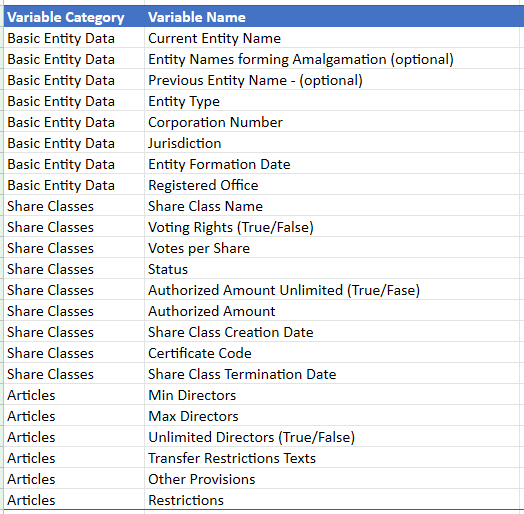




In [ ]:
# creating an empty list
lst = []
 
# number of elements as input
n = int(input("Enter number of variables to extract: "))
 
# iterating till the range
for i in range(0, n):
    ele = str(input("Enter the variable text ( entity) that you wish to extract from the document"))
 
    lst.append(ele) # adding the element
     
print(lst)

Enter number of variables to extract: 1
Enter the variable text ( entity) that you wish to extract from the documentCorporation
['Corporation']


## 3 .Ingest input text extracted using fitz (PyMuPDF)

In [ ]:
ENTITIES = lst 
with open(os.path.join(base_path, "pdf5.pdf_fitz.txt"), encoding="utf8") as f:#smaller file 
  TEXTS = f.readlines()


## 4 .Load pre trained spaCy model 
We have used the small model. spaCy comes with various models in many languages. 

In [ ]:
nlp = spacy.load("en_core_web_sm")



## 4 .Add patterns to PhraseMatcher 

In [ ]:
matcher = Matcher(nlp.vocab)
pattern = []
for i in ENTITIES:
  pattern.append({"LOWER": i})
  matcher.add(i, None, pattern)



In [ ]:
from spacy.matcher import PhraseMatcher
pattern_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
patterns = [nlp(text) for text in ENTITIES]
pattern_matcher.add("TerminologyList", patterns)

In [ ]:
pattern_matcher

## 5 .List to store training data generated by the model 

In [ ]:
TRAINING_DATA = []
TRAINING_DATA_PATTERN = []

## 6 . Create a document from the text to search and use the PhraseMatcher to find where the terms occur in the text.

In [ ]:
for doc in nlp.pipe(TEXTS):
  # Match on the doc and create a list of matched spans
  spans = [doc[start:end] for match_id, start, end in pattern_matcher(doc)]
  # Get (start character, end character, label) tuples of matches
  entities = [(span.start_char, span.end_char, "CURENT") for span in spans]
  # Format the matches as a (doc.text, entities) tuple
  training_example = (doc.text, {"entities": entities})
  # Append the example to the training data
  TRAINING_DATA_PATTERN.append(training_example)

## 7 .Annotated training data from text extracted using fitz  

In [ ]:

print(*TRAINING_DATA_PATTERN[100:200], sep="\n")

('Does Chairman have casting vote?\n', {'entities': []})
('N/y\n', {'entities': []})
('Address\n', {'entities': []})
('Name\n', {'entities': []})
('Cdn Res.\n', {'entities': []})
('Elected\n', {'entities': []})
('Patrick Trotter\n', {'entities': []})
('yes\n', {'entities': []})
('Nov 4 13\n', {'entities': []})
('501 River Oaks Drive\n', {'entities': []})
('Sheboygan Falls, Wisconsin U.S.A.\n', {'entities': []})
('50385-1415\n', {'entities': []})
('Nov 4 13\n', {'entities': []})
('501 River Oaks Drive\n', {'entities': []})
('Sheboygan Falls, Wisconsin U.S.A.\n', {'entities': []})
('s0385-1415\n', {'entities': []})
('Margo Trotter\n', {'entities': []})
('yes\n', {'entities': []})
('Heidi Fretz-Bongers\n', {'entities': []})
('yes\n', {'entities': []})
('Nov 4 13\n', {'entities': []})
('87 Farmhouse Road\n', {'entities': []})
('London, Ontario NsY 5M4\n', {'entities': []})
('yes\n', {'entities': []})
('Nov 4 13\n', {'entities': []})
('56 Victor Ave.\n', {'entities': []})
('Toronto, Ontario

## 8 .Ingest input text extracted using PuPDF2 

In [ ]:
with open(os.path.join(base_path, "pdf5_pypdf2.txt"), encoding="utf8") as f:#smaller file 
  TEXTS = f.readlines()

In [ ]:
for doc in nlp.pipe(TEXTS):
  # Phrase Match on the doc and create a list of matched spans
  spans = [doc[start:end] for match_id, start, end in pattern_matcher(doc)]
  # Get (start character, end character, label) tuples of matches
  entities = [(span.start_char, span.end_char, "CURENT") for span in spans]
  # Format the matches as a (doc.text, entities) tuple
  training_example = (doc.text, {"entities": entities})
  # Append the example to the training data
  TRAINING_DATA_PATTERN.append(training_example)

## 9 .Annotated data generated from text extracted using PyPDF2 

In [ ]:

print(*TRAINING_DATA_PATTERN[200:300], sep="\n")

('EC = Emplovee/Consultant\n', {'entities': []})
('M = Member\n', {'entities': []})
('Al = Accredited lnvestor\n', {'entities': []})
('PRINCIPALS\n', {'entities': []})
('\x0cName\n', {'entities': []})
('D\n', {'entities': []})
('o\n', {'entities': []})
('S\n', {'entities': []})
('c\n', {'entities': []})
('M\n', {'entities': []})
('M\n', {'entities': []})
('EC\n', {'entities': []})
('AI\n', {'entities': []})
('Contact\n', {'entities': []})
('Ackles, Erin\n', {'entities': []})
('c\n', {'entities': []})
('c\n', {'entities': []})
('c\n', {'entities': []})
('Fretz-Bongers, Heidi\n', {'entities': []})
('c\n', {'entities': []})
('c\n', {'entities': []})
('c\n', {'entities': []})
('Trotter Wellness Ltd.\n', {'entities': []})
('c\n', {'entities': []})
('Trotter, Marqo\n', {'entities': []})
('c\n', {'entities': []})
('c\n', {'entities': []})
('c\n', {'entities': []})
('Trotter, Patrick\n', {'entities': []})
('c\n', {'entities': []})
('c\n', {'entities': []})
('c\n', {'entities': []})
('Current P

## 10 .Using the sample minutebook to extract phrases 

In [ ]:
with open(os.path.join(base_path, "sample-minutebook.pdf.txt"), encoding="utf8") as f:#smaller file 
  TEXTS = f.readlines()

In [ ]:
for doc in nlp.pipe(TEXTS):
  # Phrase Match on the doc and create a list of matched spans
  spans = [doc[start:end] for match_id, start, end in pattern_matcher(doc)]
  # Get (start character, end character, label) tuples of matches
  entities = [(span.start_char, span.end_char, "CURENT") for span in spans]
  # Format the matches as a (doc.text, entities) tuple
  training_example = (doc.text, {"entities": entities})
  # Append the example to the training data
  TRAINING_DATA_PATTERN.append(training_example)

In [ ]:
print(*TRAINING_DATA_PATTERN[0:100], sep="\n")

('WELL CANADA LTD.\n', {'entities': []})
('Corporate lnformation Summary\n', {'entities': []})
('as at November 25,2013\n', {'entities': []})
('Law Firm:\n', {'entities': []})
('Siskinds LLP\n', {'entities': []})
('Tel\n', {'entities': []})
("5',t9 672-212'.1\n", {'entities': []})
('Fax\n', {'entities': []})
('519 672-9296\n', {'entities': []})
('Personnel:\n', {'entities': []})
('Graeme Sperryn\n', {'entities': []})
('Jennifer A. Bolton\n', {'entities': []})
('solicitor\n', {'entities': []})
('clerk\n', {'entities': []})
('LAW FIRM INFORMATION\n', {'entities': []})
('File No.:\n', {'entities': []})
('840423\n', {'entities': []})
('Record No.:\n', {'entities': []})
('840423\n', {'entities': []})
('Accountinq No.:\n', {'entities': []})
('840423\n', {'entities': []})
('File Opening Date:\n', {'entities': []})
('November 6, 2013\n', {'entities': []})
('French Name:\n', {'entities': []})
('Date of lncorporation:\n', {'entities': []})
('November 4,2013\n', {'entities': []})
('Leqal Structur

We were able to extract the input variable from the sample minutebook as well 

## 11 . spaCy NER model pipleline 

Create a blank model. We do not want to use the default entities that come with the pretrained model. 
We run through 20 iterations. The losses eventually go down. It is possible to break through the iterations when the desired loss is achieved but it was not attempted here and will be implemented in future experiments.
The model achieved close to zero loss at the 20th iteration. 
Training started 9 am and was set for 50 iterations.


In [ ]:
# Create a blank "en" model
nlp = spacy.blank("en")
# Create a new entity recognizer and add it to the pipeline
ner = nlp.create_pipe("ner")
nlp.add_pipe(ner)
# Add the label to the entity recognizer
ner.add_label("CURENT")

50 iterations

In [ ]:
nd 

In [ ]:
# Start the training
nlp.begin_training()

# Loop for 10 iterations
for itn in range(50):
    # Shuffle the training data
    random.shuffle(TRAINING_DATA_PATTERN)
    losses = {}

    # Batch the examples and iterate over them
    for batch in spacy.util.minibatch(TRAINING_DATA_PATTERN, size=2):
        texts = [text for text, entities in batch]
        annotations = [entities for text, entities in batch]

        # Update the model
        nlp.update(texts, annotations, losses=losses)
    print(losses)

{'ner': 66.75063953495035}
{'ner': 22.550002429598514}
{'ner': 10.167135305284837}
{'ner': 5.658019128244643e-09}
{'ner': 43.08234587201274}
{'ner': 19.546118064170404}
{'ner': 15.144491456645849}
{'ner': 13.787539857683162}
{'ner': 2.100378833354523e-06}
{'ner': 1.908439447631285e-08}
{'ner': 59.9769422949533}
{'ner': 2.000822748550252}
{'ner': 6.036499782811672e-08}
{'ner': 24.54590608492479}
{'ner': 15.338911237331075}
{'ner': 8.904168772557725}
{'ner': 6.600094507757604}
{'ner': 5.602735674546458}
{'ner': 4.679160871918611}
{'ner': 6.160068449047156e-07}
{'ner': 0.00029341139892699277}
{'ner': 19.974263036027253}
{'ner': 11.487381045978928}
{'ner': 2.5594191848542693e-08}
{'ner': 1.0228337195247094e-08}
{'ner': 16.683727441133957}
{'ner': 16.103512072790103}
{'ner': 35.03336225409429}
{'ner': 2.284111855533756}
{'ner': 9.755586620235347}
{'ner': 2.007497943737767}
{'ner': 8.155443399186323}
{'ner': 7.895837454979796}
{'ner': 5.2297723917955246}
{'ner': 2.1120481601349503}
{'ner': 3

In [ ]:
# Save our trained Model
#modelfile = input("Enter your Model Name: ")
nlp.to_disk('spacy_50')


In [ ]:
nlp = spacy.load('spacy_50')

In [ ]:
#Test your text
test_text = "Corporation number 1 . The owner of the Corporation is  Pearson Specter "

doc = nlp(test_text)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Corporation 0 11 CURENT
Corporation 40 51 CURENT


## 10 . Testing the ner model on unseen data  

The word "Corporation" was extracted by the model.



##11. Evaluating the model 


##11. Conclusion
spaCy can be used to annotate text data

However, text data generated from minute books is noisy and unclean. By cleaning text, we might lose important information. Also, the time to train is slow, as it utilizes CPU on colab. Use of OCR for text extraction, json for annotation, open source domain specific datasets ( text and PDF ) could help. 

In [ ]:
from spacy.gold import GoldParse
from spacy.scorer import Scorer

def evaluate(ner_model, examples):
    scorer = Scorer()
    for input_, annot in examples:
        doc_gold_text = ner_model.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=annot)
        pred_value = ner_model(input_)
        scorer.score(pred_value, gold)
    return scorer.scores

# example run

examples = [
    ('Who is Pearson Specter?',
     [(8, 15, 'CURENT')]),
    ('I like Pearson Specter.',
     [(8, 14, 'CURENT')])
]

ner_model = spacy.load('spacy_50') # for spaCy's pretrained use 'en_core_web_sm'
results = evaluate(ner_model, examples)

In [ ]:
results

{'ents_f': 0.0,
 'ents_p': 0.0,
 'ents_per_type': {},
 'ents_r': 0.0,
 'las': 0.0,
 'las_per_type': {'': {'f': 0.0, 'p': 0.0, 'r': 0.0}},
 'tags_acc': 0.0,
 'textcat_score': 0.0,
 'textcats_per_cat': {},
 'token_acc': 100.0,
 'uas': 0.0}

In [ ]:
  
print ("Dict key-value are : ")
for i in results:
    if (i == "ents_p"):
      print("Precision Score", results[i])
    if (i == "ents_r"):
      print("Recall Score", results[i])
    if (i == "ents_f"):
      print("F1 Score", results[i])
      
    

Dict key-value are : 
Precision Score 0.0
Recall Score 0.0
F1 Score 0.0


In [ ]:
  
print ("Dict key-value are : ")
for i in results:
    if (i == "ents_p"):
      print("Precision Score", results[i])
    if (i == "ents_r"):
      print("Recall Score", results[i])
    if (i == "ents_f"):
      print("F1 Score", results[i])
      

Dict key-value are : 
Precision Score 0.0
Recall Score 0.0
F1 Score 0.0


Precision quantifies the number of positive class predictions that actually belong to the positive class.

Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.

F-Measure provides a single score that balances both the concerns of precision and recall in one number.
